## Using zernike method in SimLight to generate an aberrated light field and fit its coefficients

### Imports modules

In [1]:
import random

import SimLight as sl
import SimLight.plottools as slpl

SimLight 0.0.4



### Configures the units

In [2]:
m = 1
cm = 1e-2
mm = 1e-3
µm = 1e-6
nm = 1e-9

### Configures the parameters

In [3]:
wavelength = 0.550 * µm
size = 5 * mm
N = 1000  # pixels number
j = 15  # zernike orders
random.seed(235)

### Generates an aberrated surface using zernike method

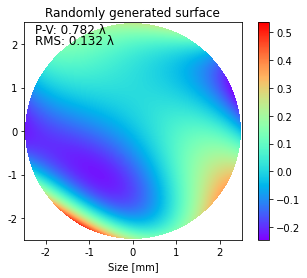

In [4]:
F = sl.PlaneWave(wavelength, size, N)
Z_original = sl.zernike.ZernikeCoefficients(j)
for i in range(j):
    Z_original.coefficients[i] = random.uniform(-.05, .05)
F_original = sl.aberration(F, Z_original)
F_original = sl.circle_aperture(F_original)
F_original.plot_wavefront(mask_r=1, title='Randomly generated surface')

### Adds noise to original surface

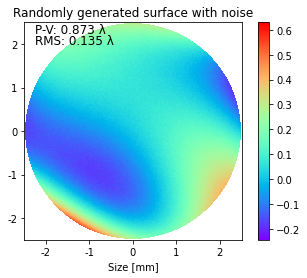

In [5]:
F_noise = slpl.plot_wavefront(F_original, noise=True, mask_r=1, title='Randomly generated surface with noise')

### Fits zernike coefficients

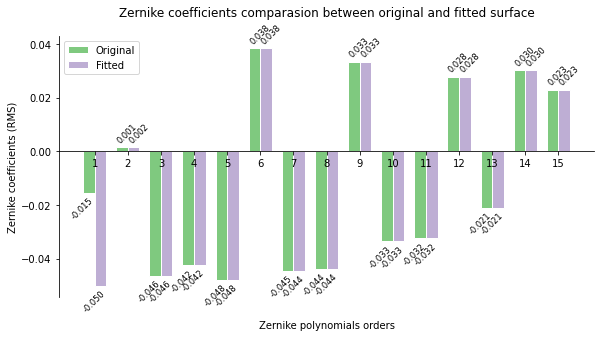

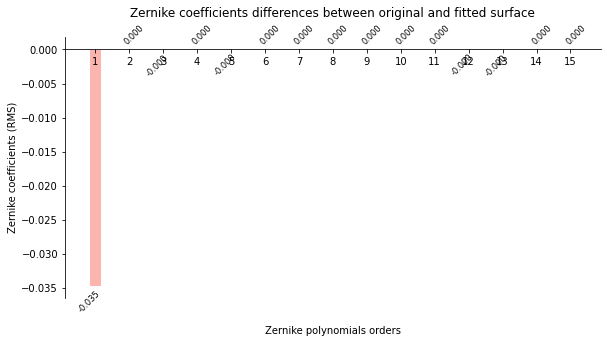

In [6]:
fitted_coeffs = sl.zernike_coeffs(F_noise, j, wavelength=wavelength)
slpl.plot_zernike_coeffs(Z_original.coefficients, fitted_coeffs, labels=['Original', 'Fitted'], title='Zernike coefficients comparasion between original and fitted surface')
slpl.plot_zernike_coeffs(fitted_coeffs - Z_original.coefficients, title='Zernike coefficients differences between original and fitted surface')

### Generates the fitted surface

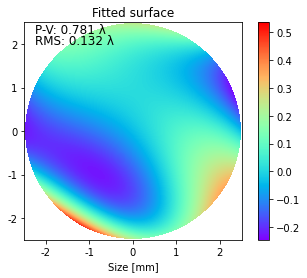

In [7]:
Z_fitted = sl.zernike.ZernikeCoefficients(j, coefficients=fitted_coeffs)
F_fitted = sl.aberration(F, Z_fitted)
F_fitted = sl.circle_aperture(F_fitted)
F_fitted.plot_wavefront(mask_r=1, title='Fitted surface')

### Remaining aberration after fitting

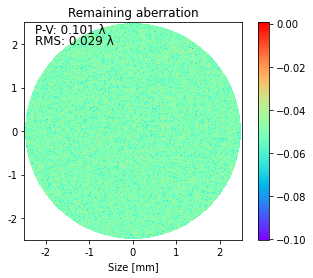

In [8]:
slpl.plot_wavefront_diff(F_noise, F_fitted, title='Remaining aberration')